## Exploratory data analysis

-Today we will be looking at the King County House Sales dataset. The data provided will help us build a regression analysis model that will help us predict future housing prices based on certain elements. The goal is to find trends that helps investors pinpoint the most profitable properties.
- The first questions I would like to awnser are:
* How does square footage affect the housing price
* Does having a waterfront view affect the price.
* What are the average prices in different zipcodes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

In [2]:
data = pd.read_csv('D:\Flation\mod_2\Project2\Mod_2_Project/Mod_2 _Project/data_files/kc_house_data.csv') #uploaded the csv file to a pandas DataFrame

In [3]:
data.head() #Taking a look at the columns in the df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe() #using the describe function to get some decriptive statistics to get an idea of the df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data = data.drop([15856, 13301, 15147, 19239, 8748]) # Houses range between 1 to 11 rooms so i decided to drop the houses with 10, 11 and 33 rooms because theyre probably outliers

In [6]:
data.sort_values(by=['bedrooms'], ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16830,8823900290,3/17/2015,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
6073,9822700190,8/8/2014,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
18428,8823901445,3/13/2015,934000.0,9,3.00,2820,4480,2.0,0.0,0.0,...,7,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400
4231,2902200015,1/6/2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14353,3333002450,7/8/2014,165000.0,1,1.00,850,8050,1.0,0.0,0.0,...,6,850,0.0,1906,0.0,98118,47.5427,-122.288,1590,5180
14354,3333002450,1/22/2015,490000.0,1,1.00,850,8050,1.0,0.0,0.0,...,6,850,0.0,1906,0.0,98118,47.5427,-122.288,1590,5180
12123,1773100765,4/29/2015,229000.0,1,1.00,600,3720,1.0,0.0,0.0,...,6,600,0.0,1920,0.0,98106,47.5558,-122.363,1480,4800
17854,2131700900,8/13/2014,283700.0,1,1.75,1010,10900,1.0,0.0,0.0,...,6,1010,0.0,1968,0.0,98019,47.7391,-121.982,1410,8359


In [7]:
data.info() #Using .info to get a summery of the df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 0 to 21596
Data columns (total 21 columns):
id               21592 non-null int64
date             21592 non-null object
price            21592 non-null float64
bedrooms         21592 non-null int64
bathrooms        21592 non-null float64
sqft_living      21592 non-null int64
sqft_lot         21592 non-null int64
floors           21592 non-null float64
waterfront       19216 non-null float64
view             21529 non-null float64
condition        21592 non-null int64
grade            21592 non-null int64
sqft_above       21592 non-null int64
sqft_basement    21592 non-null object
yr_built         21592 non-null int64
yr_renovated     17750 non-null float64
zipcode          21592 non-null int64
lat              21592 non-null float64
long             21592 non-null float64
sqft_living15    21592 non-null int64
sqft_lot15       21592 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [8]:
data.isna().sum() #using .isna and .sum to get a count of the NaN values in the df. About 11% of Water front is missing and 17%
# of year renovated are missing

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
data.dropna(subset=['waterfront'], inplace=True)  
data.isna().sum() 
#I decided to take out the NaN waterfront properties because it doesnt help my model if the values are NaN

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)
data.isna().sum()
# I also used .fillna to fill the NaN values in the yr_renovated to 0 since its safe to assume these house were never renovated.
# This approach also does negativly inpact the model.

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             57
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [11]:
data['yrs_renovated'] = (2020 - data['yr_renovated'])
data['yrs_renovated'] = data['yrs_renovated'].replace(2020, 0)
data.head()
# Created a column that shows me how many years since the last renovation

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_renovated
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,29.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0


In [12]:
np.sort(data['grade'].unique())
#Grades range between 3 - 13

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64)

In [28]:
np.sort(data['condition'].unique())
# condition ranges between 1 - 5

array([1, 2, 3, 4, 5], dtype=int64)

In [13]:
zipcode = data['zipcode'].unique()
print(zipcode)

[98125 98028 98136 98074 98053 98003 98198 98146 98038 98115 98107 98126
 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052 98027 98117
 98058 98001 98056 98166 98023 98007 98070 98148 98105 98042 98008 98059
 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032 98045
 98102 98077 98108 98178 98177 98065 98029 98006 98109 98022 98033 98155
 98024 98168 98011 98031 98106 98072 98188 98055 98014 98039]


In [14]:
np.sort(zipcode)
# There are 70 different zipcodes in this dataset

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [15]:
type(data['date'])

pandas.core.series.Series

In [16]:
data.drop(['view', 'lat', 'long'], axis=1, inplace=True)
data.isna().sum()
#Next I dropped the view, lat, and long columns since they offer no value to the investigation.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
yrs_renovated    0
dtype: int64

In [29]:
data.describe()
# final look at the general stats after cleaning 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated,sale_month
count,1.921600e+04,1.921600e+04,19216.000000,19216.000000,19216.000000,1.921600e+04,19216.000000,19216.000000,19216.000000,19216.000000,19216.000000,19216.000000,19216.000000,19216.000000,19216.000000,19216.000000
mean,4.592498e+09,5.415924e+05,3.371669,2.116843,2082.143630,1.507573e+04,1.495004,0.007598,3.409867,7.661116,1971.045587,67.621721,98077.739748,1987.407525,0.811876,6.581338
std,2.876942e+09,3.722678e+05,0.898246,0.769287,922.372086,4.082238e+04,0.540165,0.086836,0.650222,1.176073,29.381142,361.133960,53.457042,684.762151,5.205858,3.115947
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,98001.000000,399.000000,0.000000,1.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1429.250000,5.042250e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,1490.000000,0.000000,4.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1917.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,1840.000000,0.000000,6.000000
75%,7.334501e+09,6.436125e+05,4.000000,2.500000,2550.000000,1.071450e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98117.000000,2360.000000,0.000000,9.000000
max,9.900000e+09,7.700000e+06,9.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,6210.000000,86.000000,12.000000


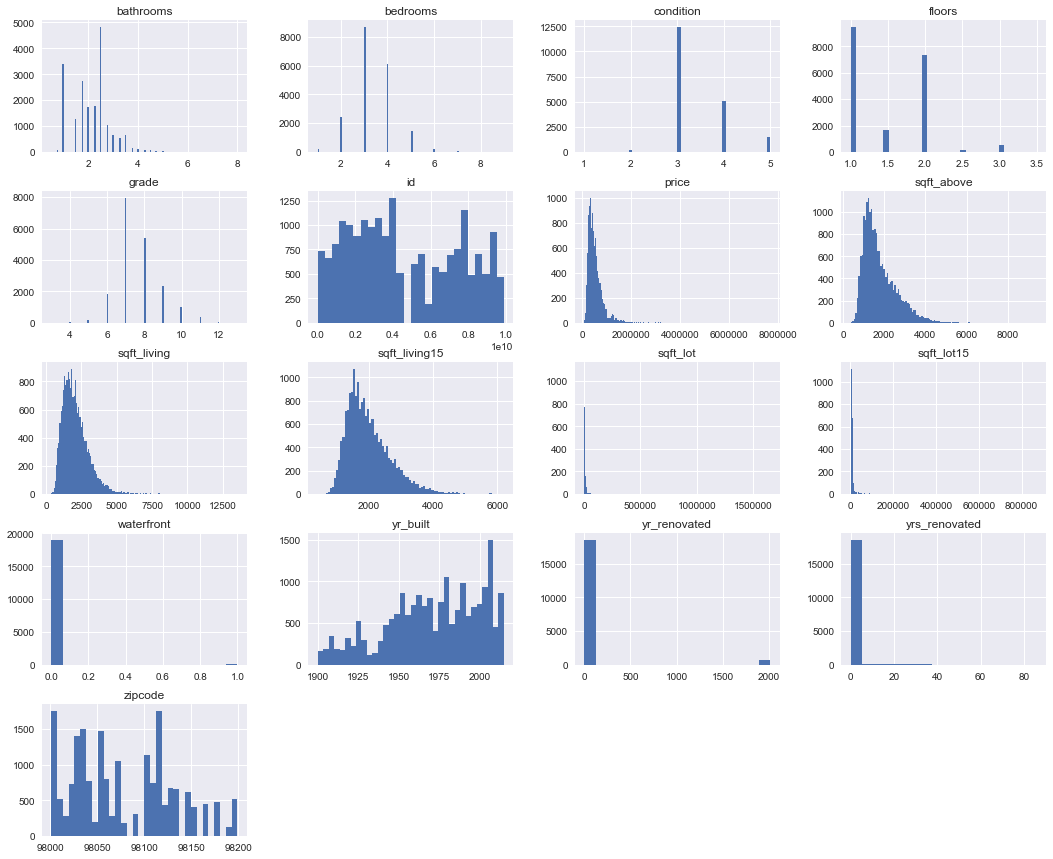

In [17]:
data.hist(figsize=(18,15), bins='auto'); 
#using .hist to see the distributions of each catagory

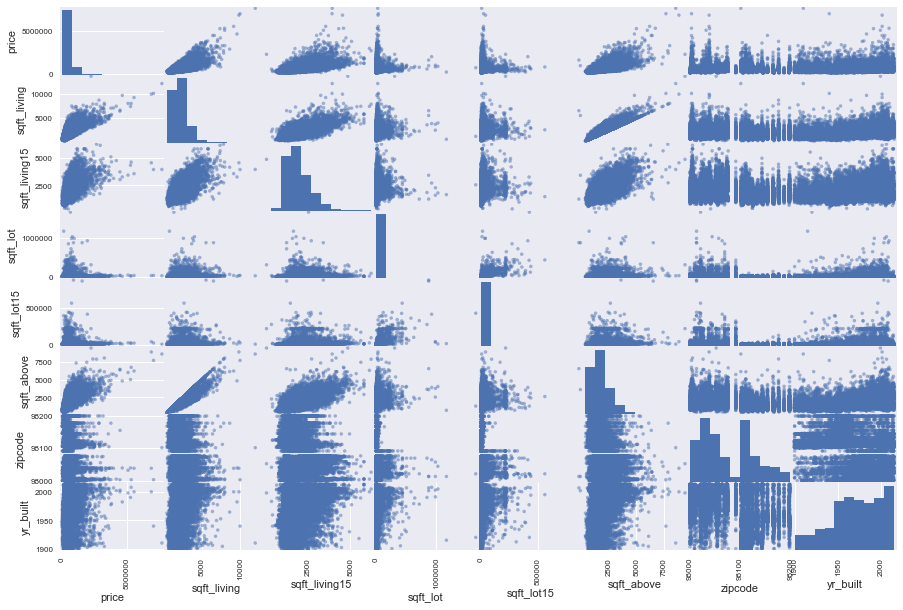

In [18]:
df = data[['price','sqft_living','sqft_living15','sqft_lot', 'sqft_lot15', 'sqft_above', 'zipcode', 'yr_built']]
pd.plotting.scatter_matrix(df, figsize=(15,10), grid=True, diagonal='hist')
plt.show()
# next I used plotting.scatter_matirx to see which columns were collinear but its kind of messy

In [19]:
df.corr() 
# using .corr helps us view the correlation more efficiently. I'm looking for values over 0.8 to show a strong correlation
# sqft_lot and sqft_lot 15 both show a strong correlation with price as do sqft_above and sqft_living. We can drop two of these
# Due to their colinearity

,price,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,zipcode,yr_built
price,1.000000,0.704668,0.582176,0.087029,0.081267,0.609200,-0.050097,0.053480
sqft_living,0.704668,1.000000,0.755813,0.173442,0.182846,0.877590,-0.196208,0.317649
sqft_living15,0.582176,0.755813,1.000000,0.146230,0.183651,0.733153,-0.278130,0.325595
sqft_lot,0.087029,0.173442,0.146230,1.000000,0.723058,0.184260,-0.129731,0.055831
sqft_lot15,0.081267,0.182846,0.183651,0.723058,1.000000,0.192321,-0.146148,0.070861
sqft_above,0.609200,0.877590,0.733153,0.184260,0.192321,1.000000,-0.258389,0.422000
zipcode,-0.050097,-0.196208,-0.278130,-0.129731,-0.146148,-0.258389,1.000000,-0.345980
yr_built,0.053480,0.317649,0.325595,0.055831,0.070861,0.422000,-0.345980,1.000000


In [20]:
data = data.drop(['sqft_lot15', 'sqft_above'], axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,29.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2720,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,4760,0.0


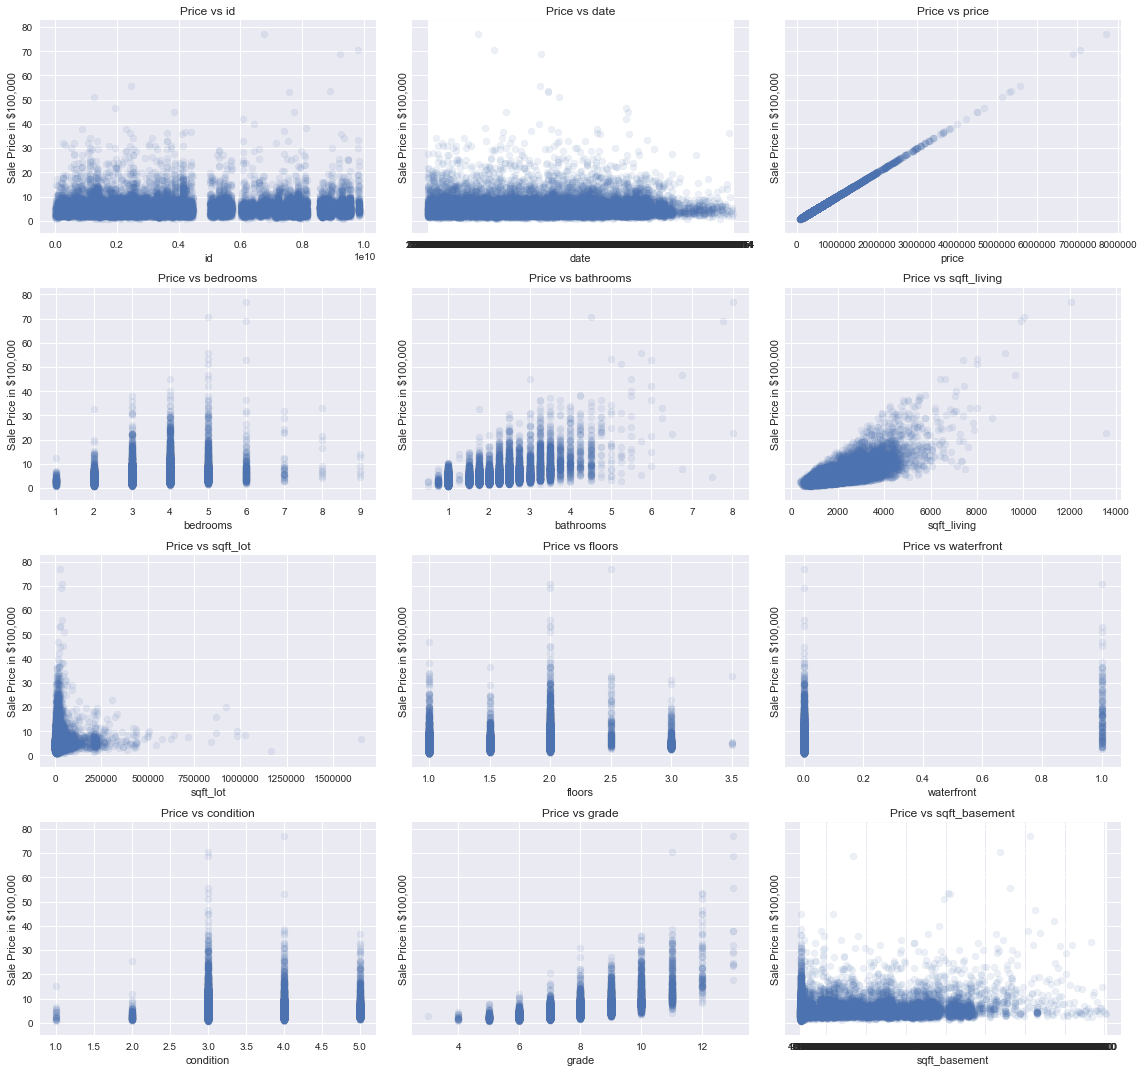

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()
# used subplots to compare pricing to multiple columns to see which ones show positive linear correlation

In [22]:
data['sale_month'] = pd.DatetimeIndex(data['date']).month
data.head()
#Used datetime index to make a column that just shows the month the house was sold

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated,sale_month
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,29.0,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2720,0.0,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,0.0,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,0.0,2
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,4760,0.0,5


<function matplotlib.pyplot.show(*args, **kw)>

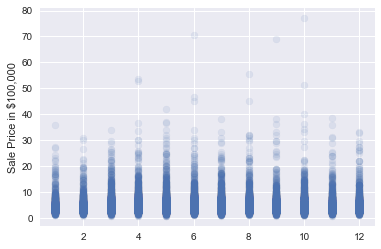

In [23]:
plt.scatter(data['sale_month'], y = data['price']/ 100_000, label=column, alpha=.1)
plt.ylabel('Sale Price in $100,000')
plt.show

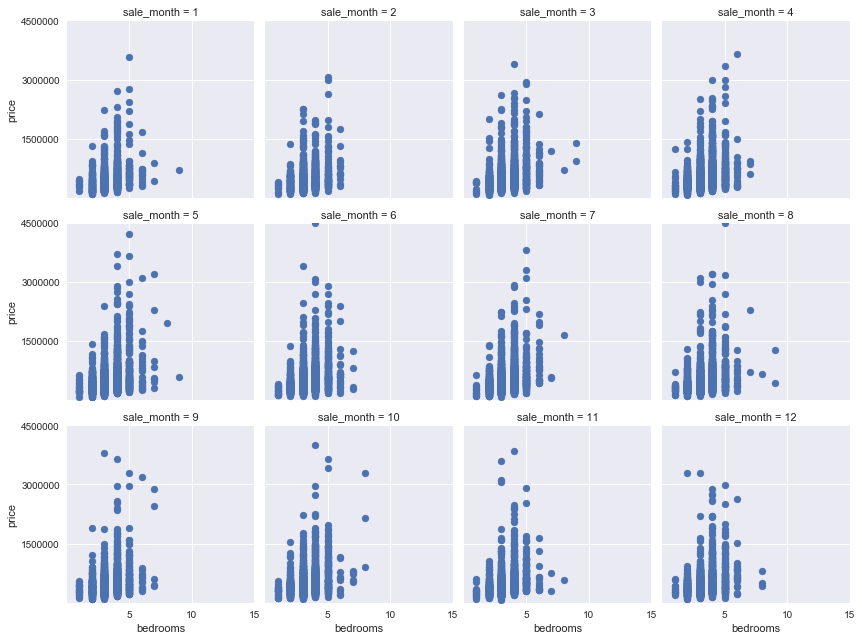

In [24]:
import seaborn as sns

g = sns.FacetGrid(data, col="sale_month", height=3, col_wrap=4)
g.map(plt.scatter, "bedrooms", "price")
g.set(xlim=(0, 15), ylim=(0, 4500000), xticks=[5, 10, 15], yticks=[1500000, 3000000, 4500000])


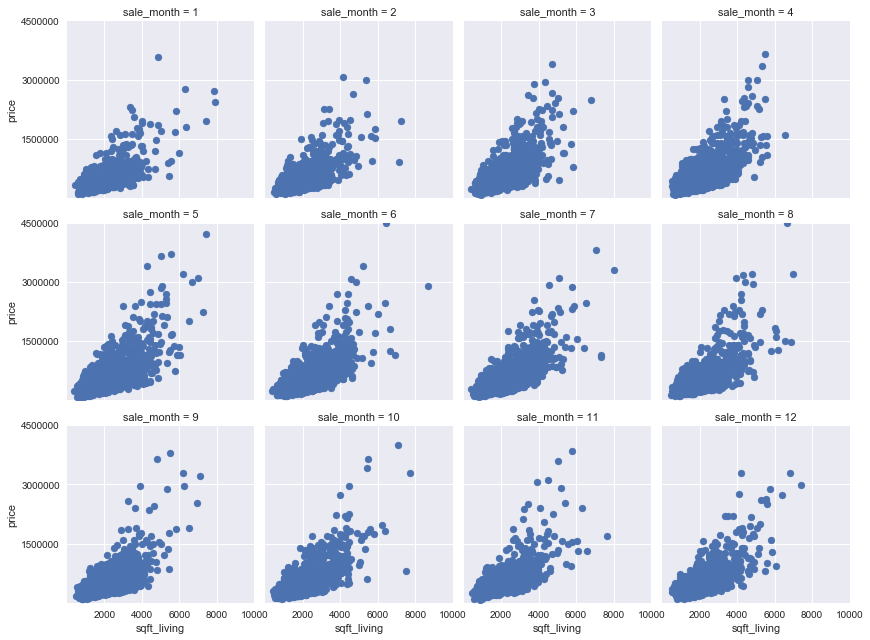

In [25]:
g = sns.FacetGrid(data, col="sale_month", height=3, col_wrap=4)
g.map(plt.scatter, "sqft_living", "price")
g.set(xlim=(0, 10000), ylim=(0, 4500000), xticks=[2000, 4000, 6000, 8000, 10000], yticks=[1500000, 3000000, 4500000])

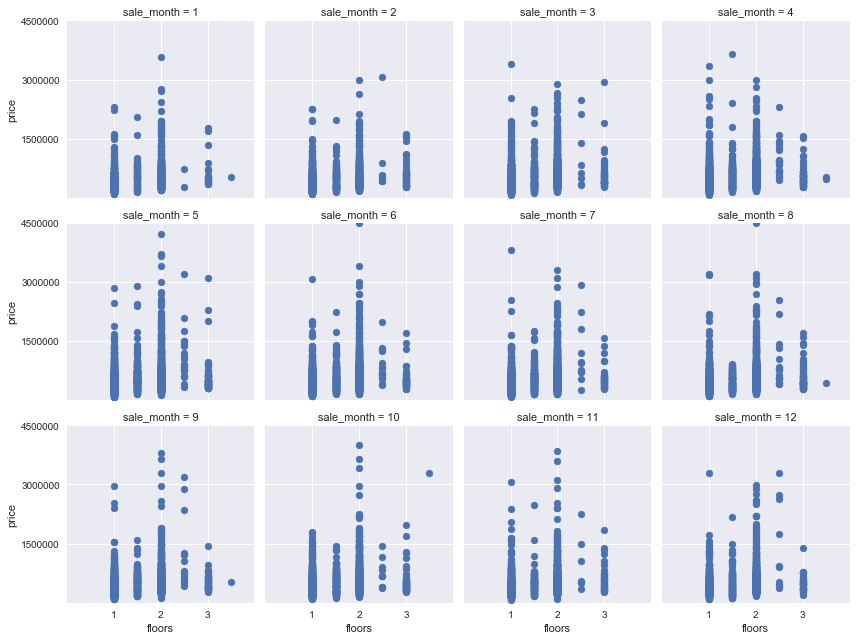

In [31]:
g = sns.FacetGrid(data, col="sale_month", height=3, col_wrap=4)
g.map(plt.scatter, "floors", "price")
g.set(xlim=(0, 4), ylim=(0, 4500000), xticks=[1, 2, 3], yticks=[1500000, 3000000, 4500000])


In [26]:
kc_cleaned = data
kc_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,yrs_renovated,sale_month
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,29.0,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,2720,0.0,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,0.0,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,0.0,2
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,1530.0,2001,0.0,98053,4760,0.0,5


In [27]:
kc_cleaned.to_csv('kc_cleaned.csv')